In [168]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORTING LIBRAIRES


In [169]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,confusion_matrix
import seaborn as sns 
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [170]:
# Read the CSV file 
df = pd.read_csv("telecom_churn.csv")

In [171]:
# Load the top 5 instances
df.head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [172]:
# Load the bottom 5 instances 
df.tail(5)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [173]:
# Check the shape of the dataframe
df.shape


(5000, 21)

In [174]:
# Display the feature columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [175]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [176]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


PERFORM DATA VISUALIZATION

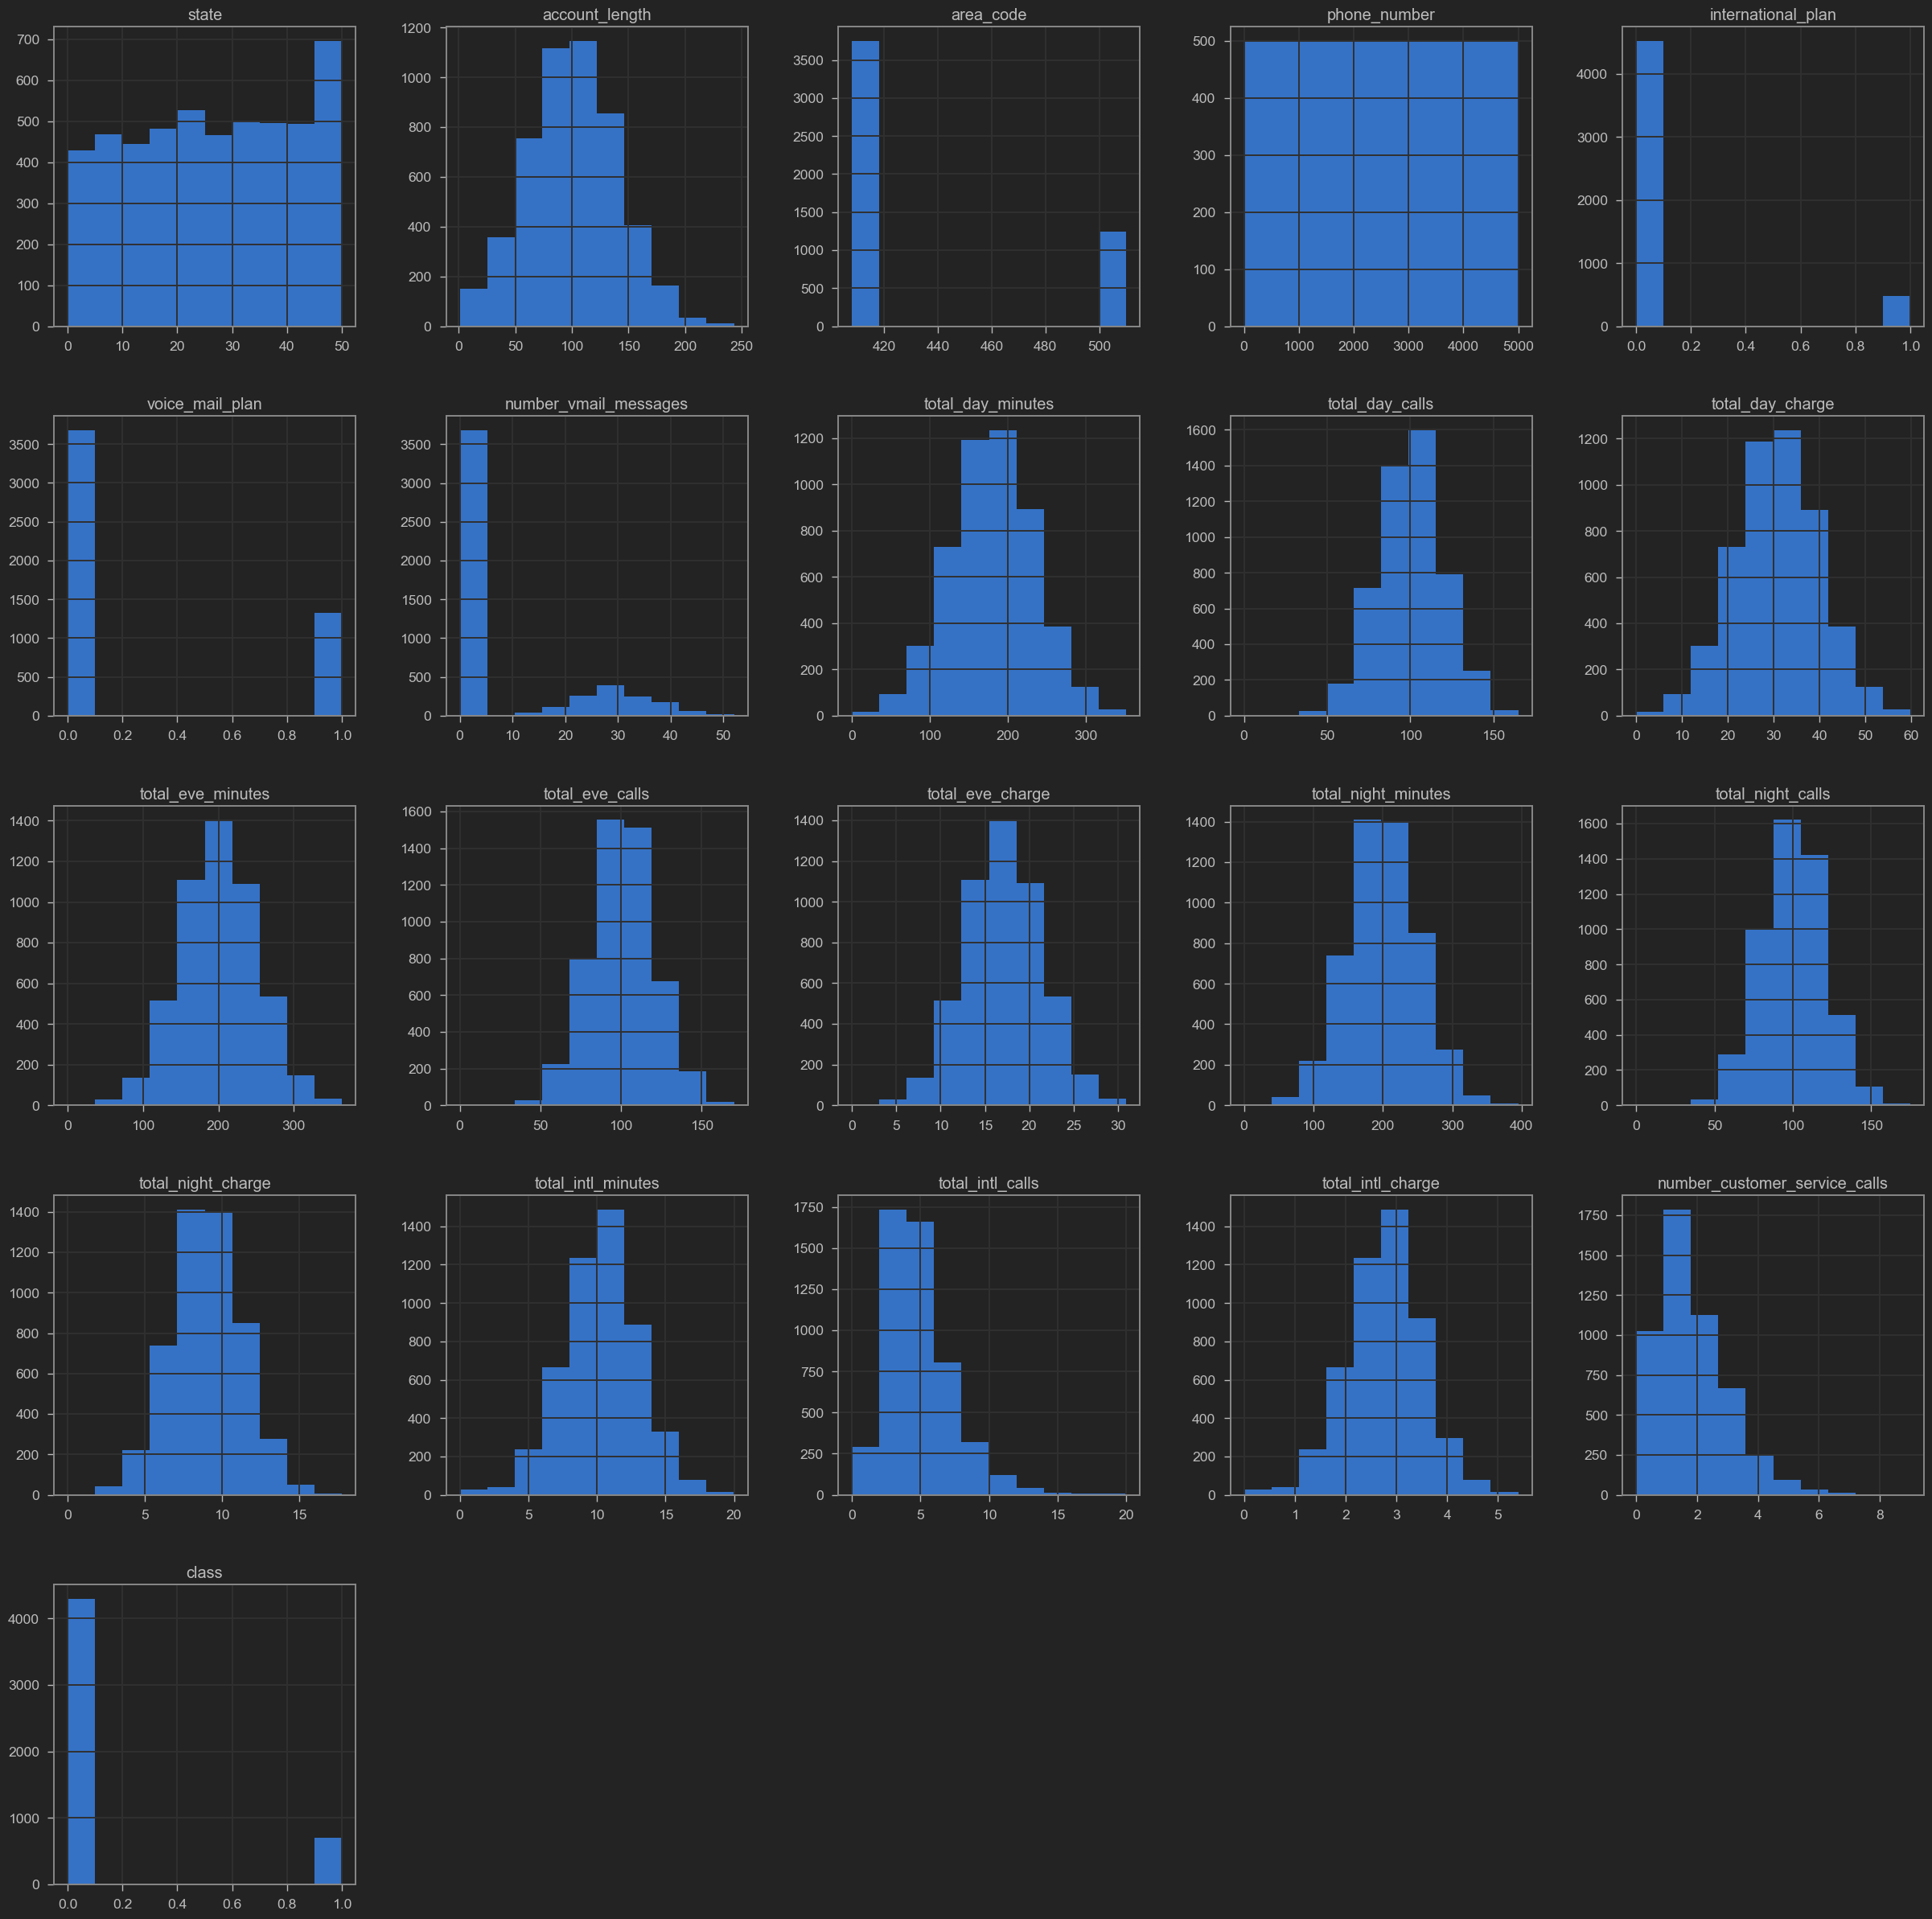

In [177]:
df.hist(figsize=(30,30))
plt.show()

In [178]:
df['class'].value_counts()

class
0    4293
1     707
Name: count, dtype: int64

In [179]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ['Retained(0)','Exited(1)'],values=df['class'].value_counts())])
fig.show()

In [180]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(df,x = 'international_plan',color='class')
fig.show()

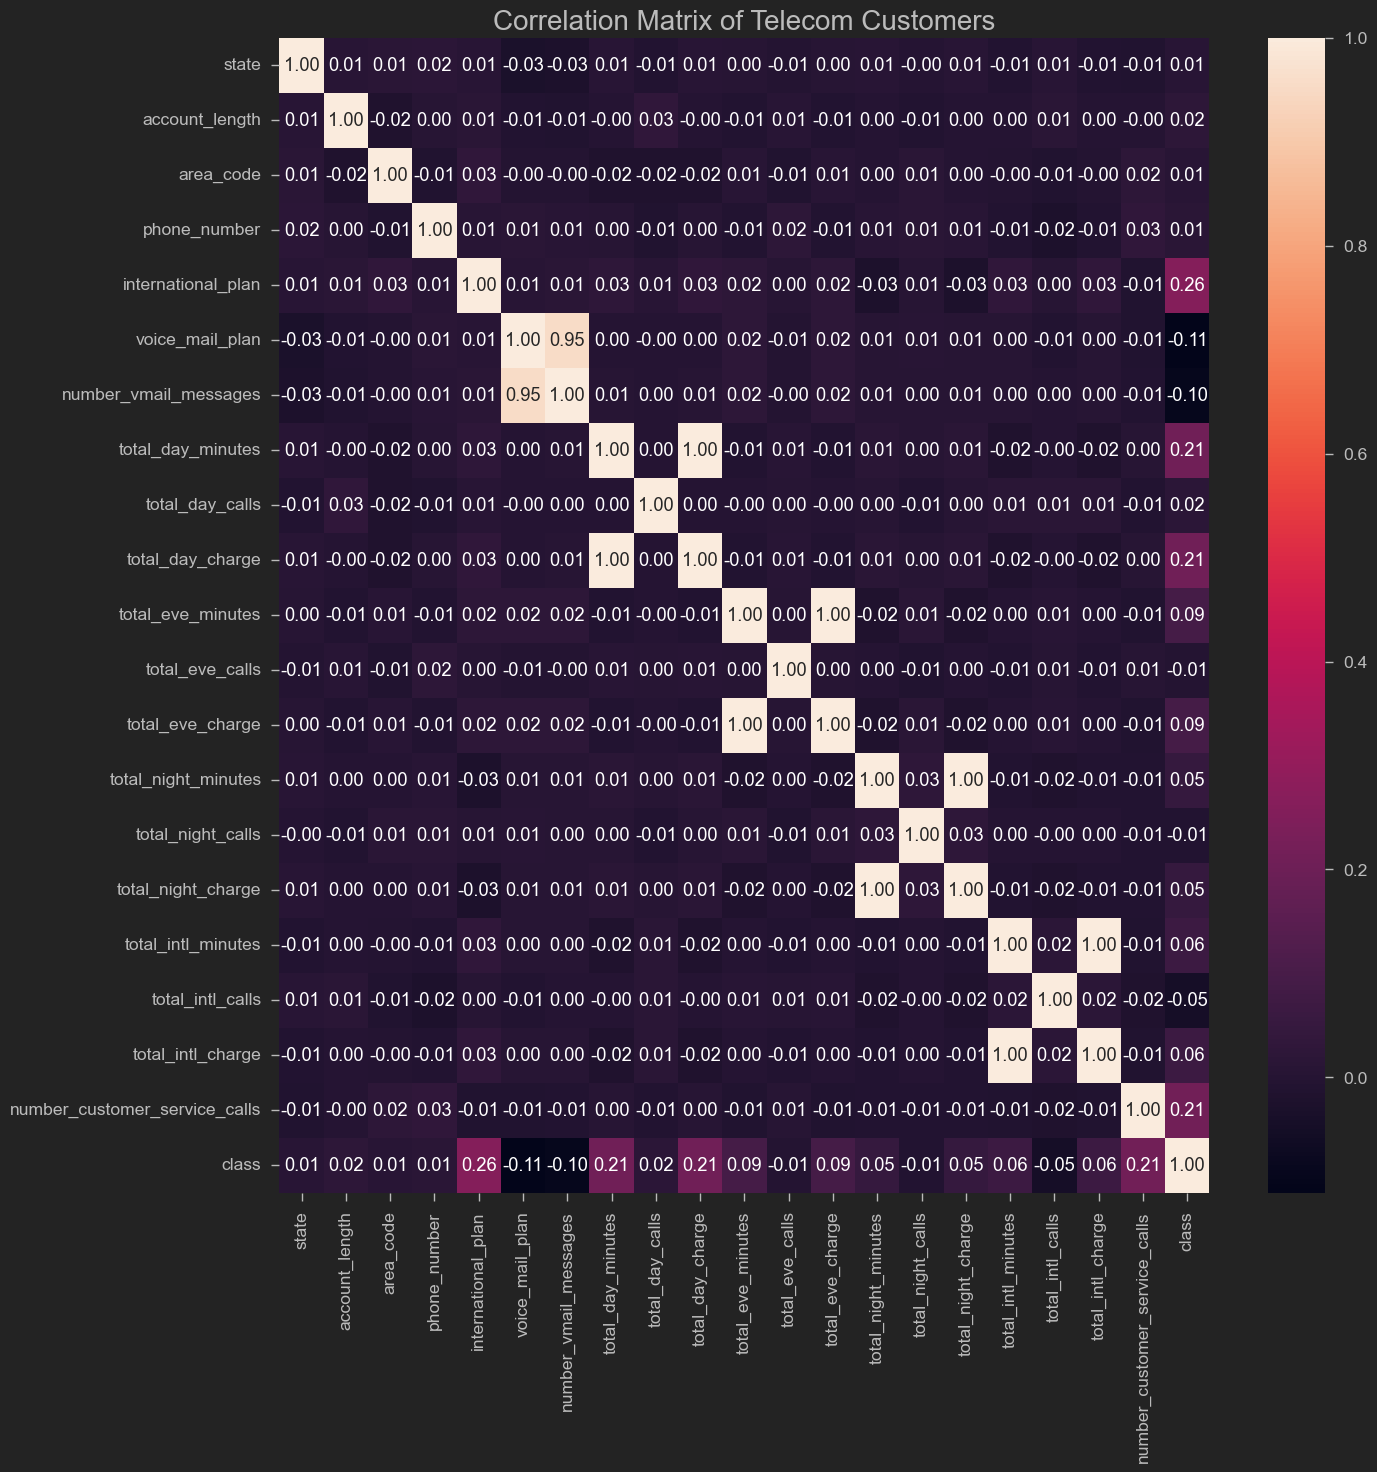

In [181]:
# Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

C:\Users\suhas\AppData\Local\Temp\ipykernel_15516\2956823839.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\suhas\AppData\Local\Temp\ipykernel_15516\2956823839.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packa

Text(0.5, 1.0, 'Distribution of day charges by churn')

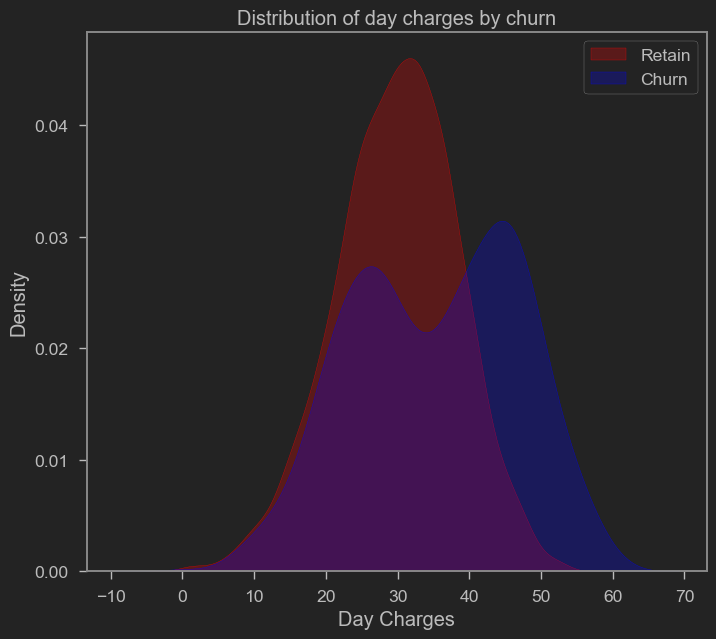

In [182]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],color = "Red", shade = True)
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],color = "Blue", shade = True)
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

C:\Users\suhas\AppData\Local\Temp\ipykernel_15516\3033667060.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\suhas\AppData\Local\Temp\ipykernel_15516\3033667060.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packa

Text(0.5, 1.0, 'Distribution of evening charges by churn')

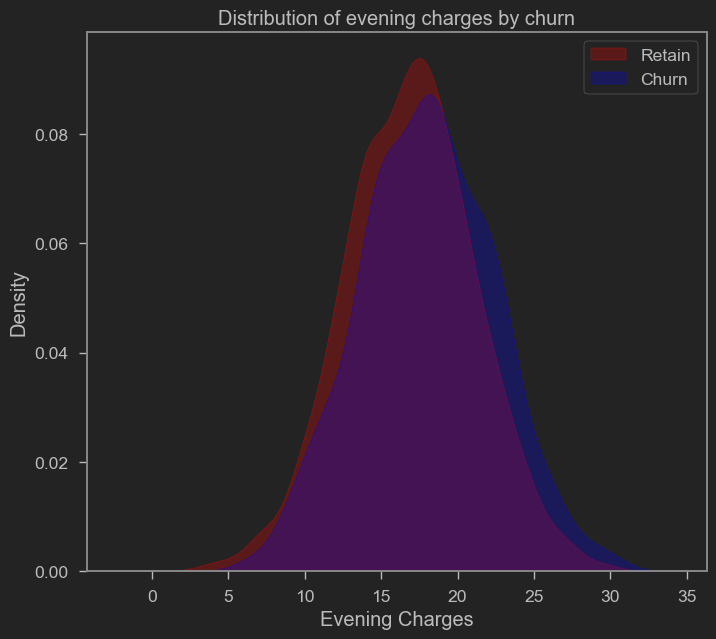

In [183]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],color = "Red", shade = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [184]:
# Plot histogram graph for the voice_mail_plan  used by the Telecom customers with respect to churned/Retained
fig = px.histogram(df,x = 'voice_mail_plan',color='class')
fig.show()


IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [185]:

X = df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["class"]

In [186]:
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,49,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,7,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,7,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [187]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [188]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [189]:
X_train.shape

(3750, 18)

In [190]:
X_test.shape

(1250, 18)

TRAIN AND EVALUATE Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train.values.ravel())


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



RandomForestClassifier()

In [192]:
y_pred = rdf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1083
           1       0.92      0.78      0.84       167

    accuracy                           0.96      1250
   macro avg       0.94      0.88      0.91      1250
weighted avg       0.96      0.96      0.96      1250



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

<Axes: >

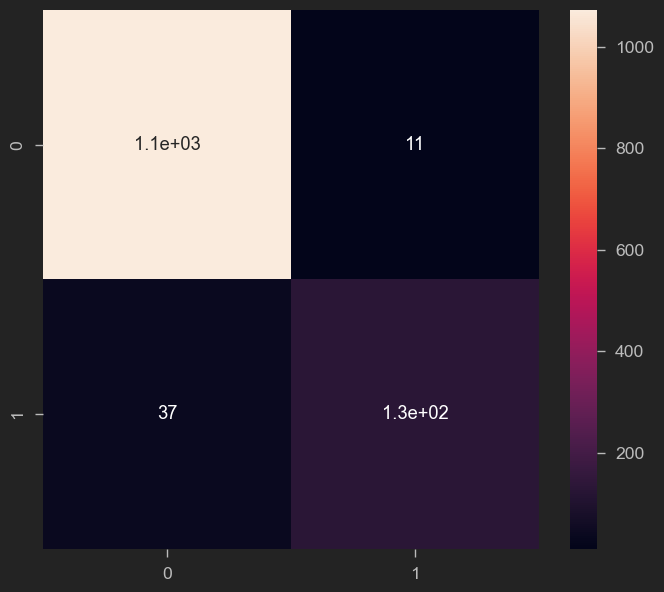

In [193]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

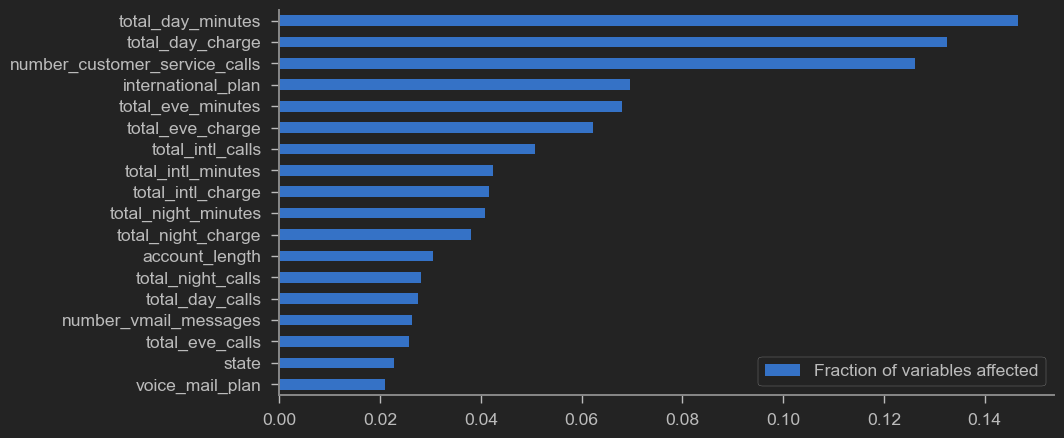

In [194]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rdf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

TRAIN AND EVALUATE Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr= LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

LogisticRegression()

In [196]:
y_pred = lr.predict(X_test)


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [197]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1083
           1       0.32      0.04      0.06       167

    accuracy                           0.86      1250
   macro avg       0.59      0.51      0.49      1250
weighted avg       0.80      0.86      0.81      1250



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

<Axes: >

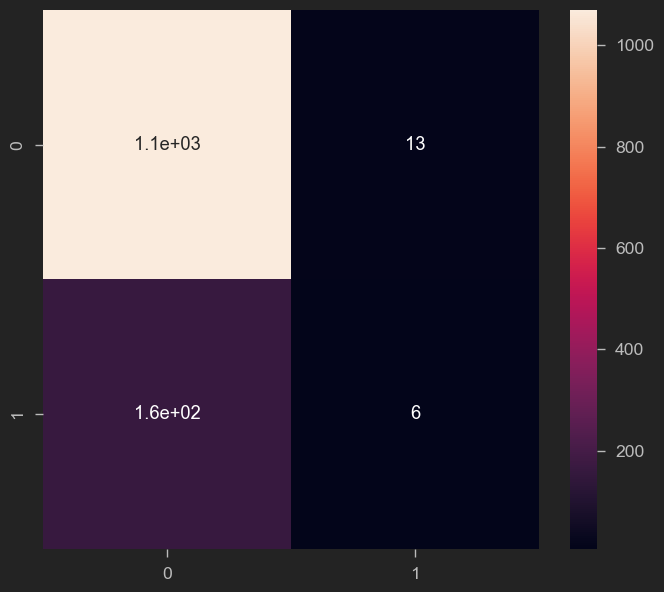

In [198]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

TRAIN AND EVALUATE LinearSVC 

In [199]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=10000)
svc = CalibratedClassifierCV(svc)
svc.fit(X_train,y_train)


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [200]:
y_pred = svc.predict(X_test)

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1083
           1       0.56      0.08      0.15       167

    accuracy                           0.87      1250
   macro avg       0.72      0.54      0.54      1250
weighted avg       0.83      0.87      0.82      1250



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

<Axes: >

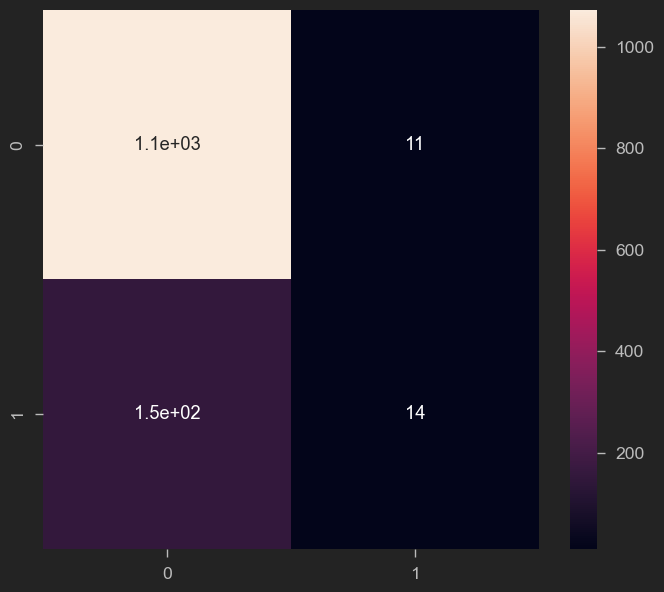

In [202]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

TRAIN AND EVALUATE KNeighbors Classifier

In [203]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

KNeighborsClassifier()

In [204]:
y_pred = knn.predict(X_test)

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1083
           1       0.69      0.30      0.42       167

    accuracy                           0.89      1250
   macro avg       0.80      0.64      0.68      1250
weighted avg       0.87      0.89      0.87      1250



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

<Axes: >

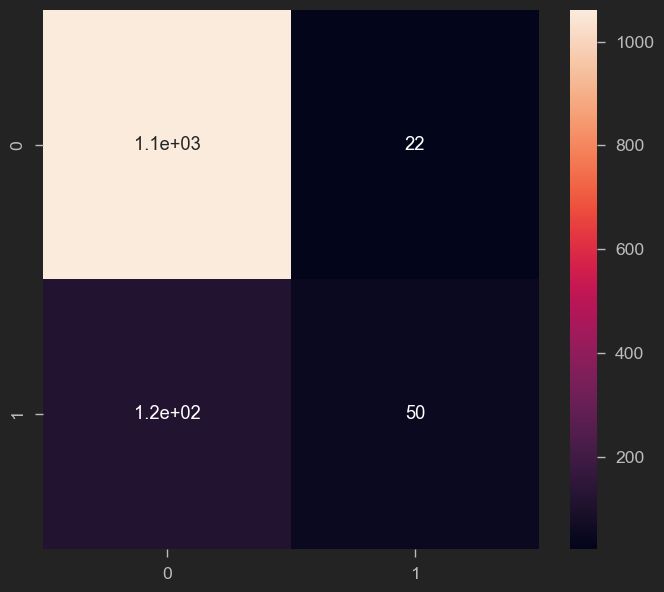

In [206]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [207]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred= nb.predict(X_test)


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1083
           1       0.56      0.57      0.57       167

    accuracy                           0.88      1250
   macro avg       0.75      0.75      0.75      1250
weighted avg       0.88      0.88      0.88      1250



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

<Axes: >

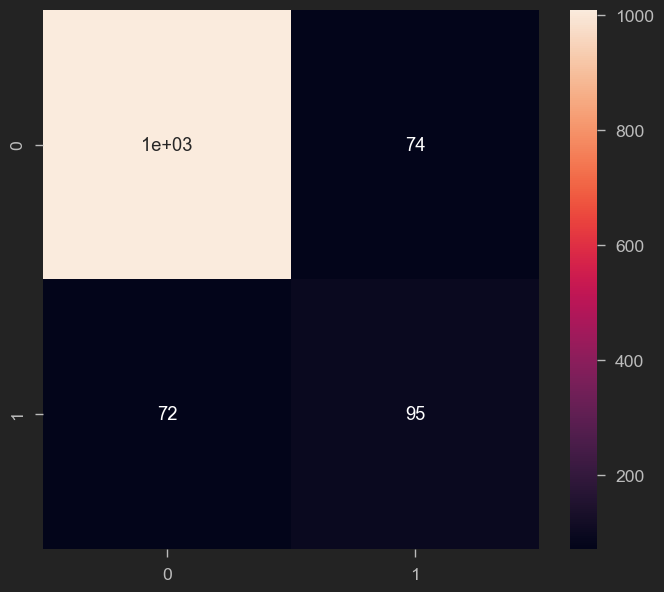

In [209]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [210]:
lr.predict_proba(X_test)

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



array([[0.97298143, 0.02701857],
       [0.71783594, 0.28216406],
       [0.86549501, 0.13450499],
       ...,
       [0.93557938, 0.06442062],
       [0.74666385, 0.25333615],
       [0.95648387, 0.04351613]])

In [211]:
lr.predict_proba(X_test)[:, 1]

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



array([0.02701857, 0.28216406, 0.13450499, ..., 0.06442062, 0.25333615,
       0.04351613])

In [212]:
y_test

2578    0
4421    1
4798    1
2329    0
1723    0
       ..
3506    0
1713    1
4437    1
4428    0
1526    0
Name: class, Length: 1250, dtype: int64

In [213]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label= 1)

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

In [214]:
fpr1

array([0.        , 0.        , 0.00461681, 0.00461681, 0.00554017,
       0.00554017, 0.01015697, 0.01015697, 0.01200369, 0.01200369,
       0.01292705, 0.01292705, 0.01477378, 0.01477378, 0.02216066,
       0.02216066, 0.02493075, 0.02493075, 0.03047091, 0.03047091,
       0.03416436, 0.03416436, 0.03601108, 0.03601108, 0.0378578 ,
       0.0378578 , 0.04893813, 0.04893813, 0.0544783 , 0.0544783 ,
       0.05724838, 0.05724838, 0.05817175, 0.05817175, 0.06740536,
       0.06740536, 0.06925208, 0.06925208, 0.07017544, 0.07017544,
       0.0710988 , 0.0710988 , 0.07479224, 0.07479224, 0.07663897,
       0.07663897, 0.07848569, 0.07848569, 0.08217913, 0.08217913,
       0.08310249, 0.08310249, 0.08402585, 0.08402585, 0.08679594,
       0.08679594, 0.08956602, 0.08956602, 0.09418283, 0.09418283,
       0.09510619, 0.09510619, 0.09787627, 0.09787627, 0.09879963,
       0.09879963, 0.10341644, 0.10341644, 0.11080332, 0.11080332,
       0.11172669, 0.11172669, 0.11265005, 0.11265005, 0.11726

In [215]:
tpr1

array([0.        , 0.00598802, 0.00598802, 0.0239521 , 0.0239521 ,
       0.02994012, 0.02994012, 0.03592814, 0.03592814, 0.04790419,
       0.04790419, 0.05389222, 0.05389222, 0.06586826, 0.06586826,
       0.07784431, 0.07784431, 0.08383234, 0.08383234, 0.09580838,
       0.09580838, 0.10179641, 0.10179641, 0.14371257, 0.14371257,
       0.16167665, 0.16167665, 0.16766467, 0.16766467, 0.17365269,
       0.17365269, 0.19760479, 0.19760479, 0.21556886, 0.21556886,
       0.22155689, 0.22155689, 0.23353293, 0.23353293, 0.25149701,
       0.25149701, 0.26347305, 0.26347305, 0.2754491 , 0.2754491 ,
       0.28143713, 0.28143713, 0.29341317, 0.29341317, 0.2994012 ,
       0.2994012 , 0.31137725, 0.31137725, 0.31736527, 0.31736527,
       0.32335329, 0.32335329, 0.33532934, 0.33532934, 0.34730539,
       0.34730539, 0.35329341, 0.35329341, 0.36526946, 0.36526946,
       0.37125749, 0.37125749, 0.37724551, 0.37724551, 0.38323353,
       0.38323353, 0.38922156, 0.38922156, 0.39520958, 0.39520

In [216]:
thresh1

array([1.8657734 , 0.8657734 , 0.72455696, 0.65882431, 0.62908471,
       0.61381174, 0.53547039, 0.52000772, 0.5132334 , 0.47673436,
       0.46905244, 0.46625613, 0.46122644, 0.4557008 , 0.44391658,
       0.4387534 , 0.42595081, 0.42434274, 0.40173286, 0.39734572,
       0.39564539, 0.39300255, 0.39162729, 0.37268587, 0.36815266,
       0.36714764, 0.35201194, 0.35048481, 0.34475829, 0.34410629,
       0.33908784, 0.33612004, 0.33484615, 0.33228917, 0.32306591,
       0.32182827, 0.32017078, 0.31893821, 0.31820496, 0.31473196,
       0.31392813, 0.31254668, 0.30612374, 0.30511723, 0.30242418,
       0.30049008, 0.29982142, 0.29942644, 0.29790075, 0.29766096,
       0.29645729, 0.29480783, 0.29401729, 0.29312985, 0.29161858,
       0.29160123, 0.29006651, 0.28485336, 0.28222711, 0.28201643,
       0.27884624, 0.27784528, 0.2764613 , 0.27474754, 0.27374844,
       0.2725605 , 0.26980922, 0.26932071, 0.25909127, 0.25867132,
       0.25805761, 0.25804474, 0.25787178, 0.25692845, 0.25232

In [217]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, svc.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rdf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, nb.predict_proba(X_test)[:, 1], pos_label = 1)


c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

In [218]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rdf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\suhas\AppData\Local\Programs\Python\Pyt

Logistic Regression:  0.727370743277987
Support Vector Machine:  0.7844753705884628
Random Forest:  0.9297416247836736
K-Nearest Neighbors:  0.7040351430103782
Naive Bayes:  0.8831644190842691


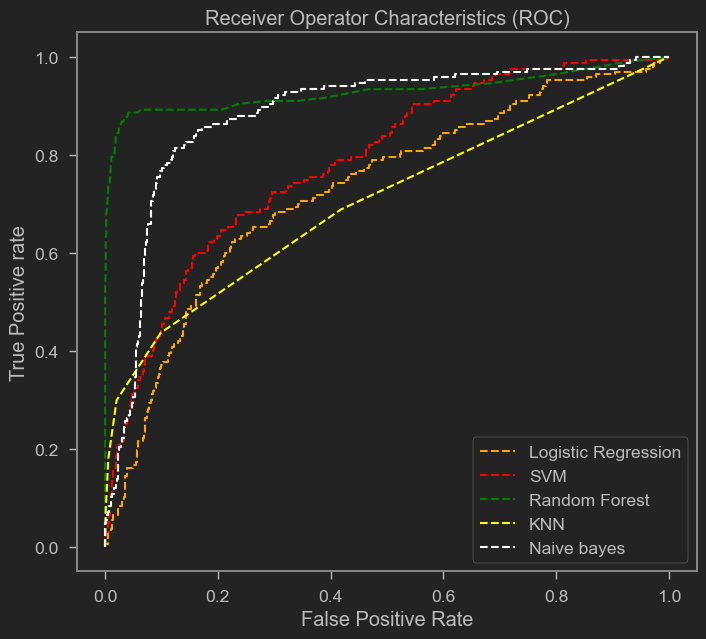

In [219]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.